# <font color=red> Deep Learning with MNIST Data
    
    
# <font color=violet> Prof J.W. MUTEBA MWAMBA

In [1]:
import tensorflow as tf
mnist=tf.keras.datasets.mnist ### this is a 28X28 pixels Dataset of hand-written digits 0 - 9
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


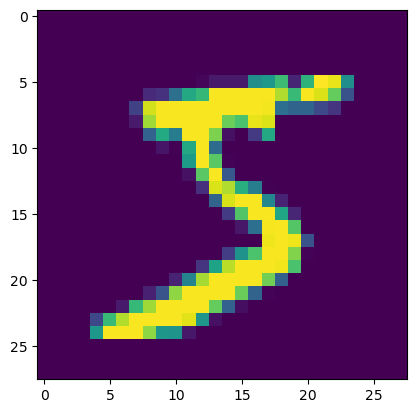

In [2]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [3]:
print(x_train[0]) ## see the data in matrix form

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

### Let's us make the image black-and-white to avoid colour processing

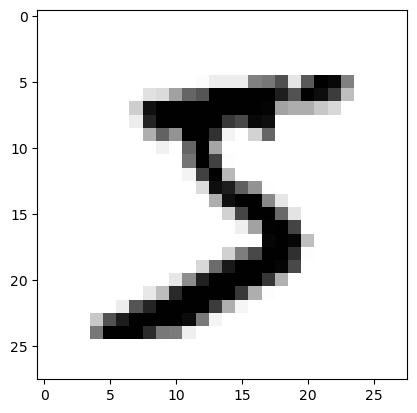

In [4]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

### We must scale (normalise the dataset)

In [5]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

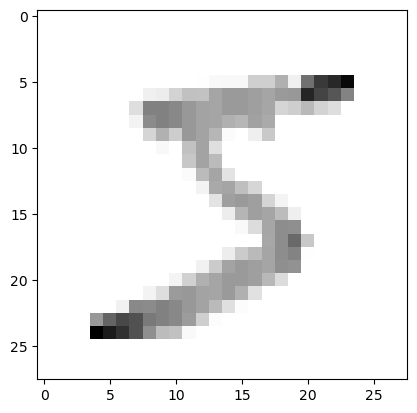

In [6]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show() ### you can spot the difference with normalised data

In [7]:
print(x_train[0]) ## see the normalized data in matrix form

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

# Build the Model: Sequential Model

In [8]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())### we must flatten the 28X28 pixels for input=784
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) ## this is the hidden layers with 128 neurons and with Relu activation function
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) ## another hidden layer with same parameter
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) ## this is the output lay, it has 10 classification outputs (0 - 9 digits) and softmax activation

### Complie the Model

In [9]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

### Fit the Model

In [10]:
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2614 - accuracy: 0.9231
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1076 - accuracy: 0.9670
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0731 - accuracy: 0.9777


## Validation loss/accuracy to see if the model is overfit to be compared with the above loss and accuracy values 

In [11]:
val_loss,val_acc=model.evaluate(x_test,y_test) ### the values are not far from the above, therefore the model is good!
print(val_loss,val_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.1011 - accuracy: 0.9713
0.10112226754426956 0.9713000059127808


## Prediction

In [12]:
predictions=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [13]:
print(predictions)

[[1.3061842e-08 7.6425309e-08 7.3646670e-06 ... 9.9998617e-01
  1.6006200e-09 9.0188706e-08]
 [3.0766534e-10 5.6592722e-05 9.9994230e-01 ... 1.4296562e-09
  1.2933901e-07 3.3521466e-13]
 [1.0239898e-08 9.9968755e-01 1.2030373e-05 ... 2.8379052e-04
  5.2998166e-06 2.5027867e-07]
 ...
 [4.6294460e-08 1.0950054e-06 1.4844910e-06 ... 2.9496907e-04
  2.9758803e-06 1.7461264e-04]
 [3.0375664e-05 4.0254131e-06 3.4021252e-06 ... 6.9624512e-06
  1.2896940e-03 1.9406374e-07]
 [5.1592474e-06 8.6477501e-09 1.1290770e-06 ... 1.5291325e-11
  3.7251939e-07 3.2654055e-09]]


### these values are decimals but the dataset had integer values from 0 to 9. to conver this to integer we use "numpy"

In [14]:
import numpy as np
print(np.argmax(predictions[0])) ### the first predicted value is "7"

7


In [15]:
### let's see if the observed data is "7"

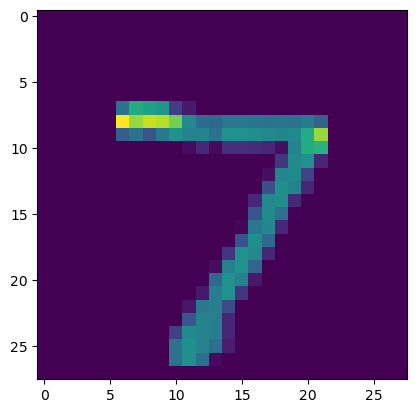

In [16]:
plt.imshow(x_test[0])
plt.show()